In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

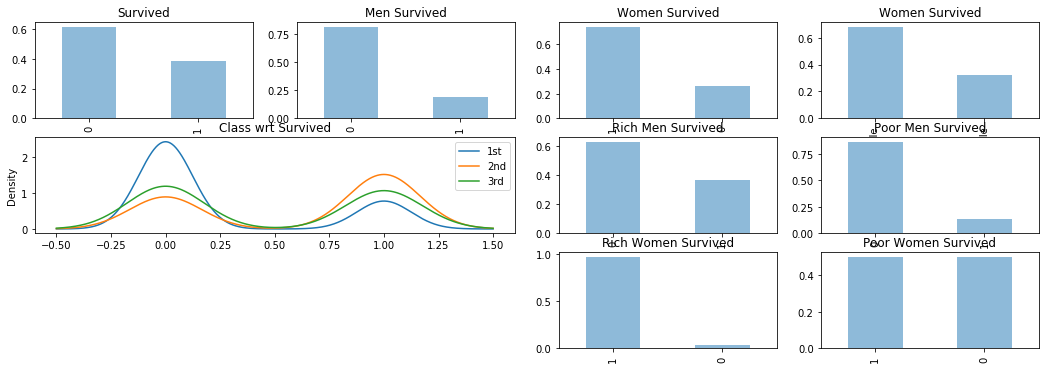

In [4]:
fig=plt.figure(figsize=(18,6))

plt.subplot2grid((3,4),(0,0))
train['Survived'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title("Survived")

plt.subplot2grid((3,4),(0,1))
train['Survived'][train['Sex']=='male'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title("Men Survived")

plt.subplot2grid((3,4),(0,2))
train['Survived'][train['Sex']=='female'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title("Women Survived")

plt.subplot2grid((3,4),(0,3))
train['Sex'][train['Survived']==1].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title("Women Survived")

plt.subplot2grid((3,4),(1,0),colspan=2)
for x in train['Pclass'].unique():
    train['Survived'][train['Pclass']==x].plot(kind='kde')
plt.title("Class wrt Survived")
plt.legend(("1st","2nd","3rd"))

plt.subplot2grid((3,4),(1,2))
filt=(train['Sex']=='male') & (train['Pclass']==1)
train.loc[filt,'Survived'].value_counts( normalize=True).plot(kind='bar',alpha=0.5)
# df['Survived'][df['Sex']=='male' & df['Pclass']==1].value_counts( normalize=True).plot(kind='bar',alpha=0.5)
plt.title("Rich Men Survived")

plt.subplot2grid((3,4),(1,3))
train['Survived'][(train['Sex']=='male') & (train['Pclass']==3)].value_counts( normalize=True).plot(kind='bar',alpha=0.5)
plt.title("Poor Men Survived")

plt.subplot2grid((3,4),(2,2))
filt=(train['Sex']=='female') & (train['Pclass']==1)
train.loc[filt,'Survived'].value_counts( normalize=True).plot(kind='bar',alpha=0.5)
# df['Survived'][df['Sex']=='male' & df['Pclass']==1].value_counts( normalize=True).plot(kind='bar',alpha=0.5)
plt.title("Rich Women Survived")

plt.subplot2grid((3,4),(2,3))
train['Survived'][(train['Sex']=='female') & (train['Pclass']==3)].value_counts( normalize=True).plot(kind='bar',alpha=0.5)
plt.title("Poor Women Survived")

plt.show()

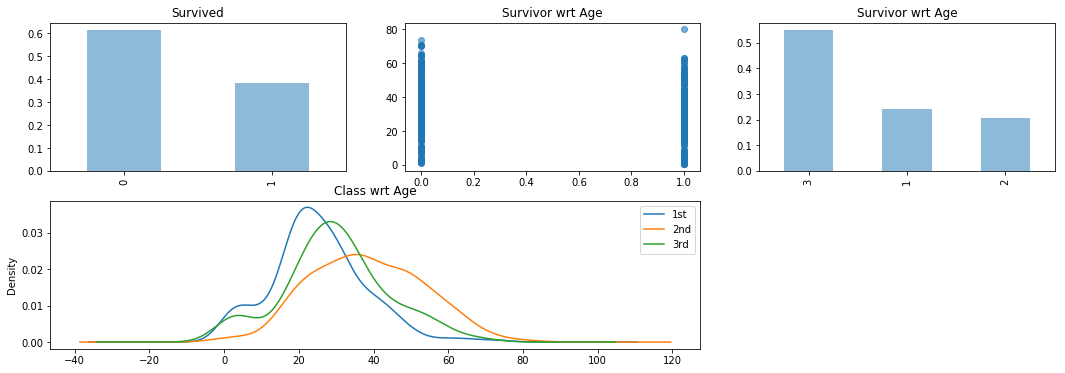

In [6]:
fig=plt.figure(figsize=(18,6))

plt.subplot2grid((2,3),(0,0))
train['Survived'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title("Survived")

plt.subplot2grid((2,3),(0,1))
plt.scatter(train['Survived'],train['Age'],alpha=0.6)
plt.title("Survivor wrt Age")

plt.subplot2grid((2,3),(0,2))
train['Pclass'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title("Survivor wrt Age")

plt.subplot2grid((2,3),(1,0),colspan=2)
# for x in df['Pclass'].unique():
#     filt=df['Pclass']==x
#     df.loc[filt,['Age']].plot(kind='kde')
for x in train['Pclass'].unique():
    train['Age'][train['Pclass']==x].plot(kind='kde')
plt.title("Class wrt Age")
plt.legend(("1st","2nd","3rd"))

plt.show()

In [18]:
def clean_data(data):
    data["Fare"]=data["Fare"].fillna(data['Fare'].dropna().median())
    data["Age"]=data["Age"].fillna(data['Age'].dropna().median())
    
    data.loc[data['Sex'] =="male","Sex"]=0
    data.loc[data['Sex'] =="female","Sex"]=1
    data["Embarked"]=data['Embarked'].fillna("S")
    data.loc[data["Embarked"]=="S","Embarked"]=0
    data.loc[data["Embarked"]=="C","Embarked"]=1
    data.loc[data["Embarked"]=="Q","Embarked"]=2
    
    data['Cabin'] = data['Cabin'].fillna('Missing')
    data['Cabin'] = data['Cabin'].str[0]
    data['Cabin'].value_counts()
    
    #Family Size & Alone 
    data['Family_Size'] = data['SibSp'] + data['Parch'] + 1
    data['IsAlone'] = 0
    data.loc[data['Family_Size']==1, 'IsAlone'] = 1
    data.head()


In [19]:
train=pd.read_csv('train.csv')
train['Hypothesis']=0
train['Hypothesis'][train.Sex=='female']=1
train['Result']=0
train['Result'][train['Survived']==train['Hypothesis']]=1
train['Result'].value_counts(normalize=True)

F:\python\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\python\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


1    0.786756
0    0.213244
Name: Result, dtype: float64

In [20]:
clean_data(train)
clean_data(test)

F:\python\anaconda\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [21]:
c_data = pd.concat([train, test], sort = False)
c_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null int64
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null int64
Hypothesis     891 non-null float64
Result         891 non-null float64
Family_Size    1309 non-null int64
IsAlone        1309 non-null int64
dtypes: float64(5), int64(8), object(3)
memory usage: 173.9+ KB


In [22]:
# Drop unwanted variables
all_1 = c_data.drop(['Name', 'Ticket'], axis = 1)
all_1.head()

all_dummies = pd.get_dummies(all_1, drop_first = True)
all_dummies.head()

all_train = all_dummies[all_dummies['Survived'].notna()]
all_train.info()

all_test = all_dummies[all_dummies['Survived'].isna()]
all_test.info()

# all_train = c_data[c_data['Survived'].notna()]
# all_train.info()

# all_test = c_data[c_data['Survived'].isna()]
# all_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 21 columns):
PassengerId    891 non-null int64
Survived       891 non-null float64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int64
Hypothesis     891 non-null float64
Result         891 non-null float64
Family_Size    891 non-null int64
IsAlone        891 non-null int64
Cabin_B        891 non-null uint8
Cabin_C        891 non-null uint8
Cabin_D        891 non-null uint8
Cabin_E        891 non-null uint8
Cabin_F        891 non-null uint8
Cabin_G        891 non-null uint8
Cabin_M        891 non-null uint8
Cabin_T        891 non-null uint8
dtypes: float64(5), int64(8), uint8(8)
memory usage: 104.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 21 columns):
Pass

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(all_train.drop(['PassengerId','Survived'],axis=1),all_train['Survived'], test_size=0.30,random_state=101)

logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(logmodel.score(X_test,y_test))

0.7947761194029851


In [25]:
from sklearn import preprocessing,svm
from sklearn.linear_model import LinearRegression,LogisticRegression
print ("\nUse polynomial features")
poly = preprocessing.PolynomialFeatures(degree=2)
features_ = poly.fit_transform(all_train.drop(['PassengerId','Survived'],axis=1))

clf11 = LogisticRegression(solver = 'liblinear')
clf11.fit(features_,all_train['Survived'])
print(clf11.score(features_,all_train['Survived']))

# scores = model_selection.cross_val_score(clf, features_, target, scoring='accuracy', cv=10)
# print (scores)
# print (scores.mean())

# test_features_ = poly.fit_transform(test_features)

# from sklearn.preprocessing import PolynomialFeatures
# poly_reg = PolynomialFeatures(degree=4)
# X_poly = poly_reg.fit_transform(X)
# pol_reg = LinearRegression()
# pol_reg.fit(X_poly, y)


Use polynomial features
0.9259259259259259


F:\python\anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
